In [1]:
import pandas as pd

train = pd.read_csv("../data/raw/train.csv")
store = pd.read_csv("../data/raw/store.csv")

train.head()

C:\Users\nishanth b\AppData\Local\Temp\ipykernel_16172\1774490738.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("../data/raw/train.csv")


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [2]:
#merge store info
df = train.merge(store, on="Store", how="left")
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [4]:
df.isna().sum().sort_values(ascending=False).head(10)


Promo2SinceWeek              508031
PromoInterval                508031
Promo2SinceYear              508031
CompetitionOpenSinceYear     323348
CompetitionOpenSinceMonth    323348
CompetitionDistance            2642
DayOfWeek                         0
Store                             0
Date                              0
Sales                             0
dtype: int64

In [5]:
#Convert Date Properly
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")

In [6]:
df["Sales"].describe()

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

In [9]:
df = df[(df["Open"] == 1) & (df["Sales"] > 0)]
df["Sales"].describe()

count    844338.000000
mean       6955.959134
std        3103.815515
min          46.000000
25%        4859.000000
50%        6369.000000
75%        8360.000000
max       41551.000000
Name: Sales, dtype: float64

We will build features in 3 layers:

1️.Calendar features
2️.Lag features
3️.Rolling window features

In [11]:
#Calendar features
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["DayOfWeek"] = df["Date"].dt.dayofweek
df["WeekOfYear"] = df["Date"].dt.isocalendar().week

df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
1016447,353,1,2013-01-01,3139,820,1,0,a,1,b,...,NaN,NaN,1,14.0,2013.0,"Feb,May,Aug,Nov",2013,1,1,1
1016429,335,1,2013-01-01,2401,482,1,0,a,1,b,...,NaN,NaN,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1
1016606,512,1,2013-01-01,2646,625,1,0,a,1,b,...,NaN,NaN,1,5.0,2013.0,"Mar,Jun,Sept,Dec",2013,1,1,1
1016588,494,1,2013-01-01,3113,527,1,0,a,1,b,...,6.0,2011.0,0,NaN,NaN,NaN,2013,1,1,1
1016624,530,1,2013-01-01,2907,532,1,0,a,1,a,...,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1


store level lag fearures

In [ ]:
df = df.sort_values(["Store", "Date"])

df["Lag_1"] = df.groupby("Store")["Sales"].shift(1)
df["Lag_7"] = df.groupby("Store")["Sales"].shift(7)
df["Lag_14"] = df.groupby("Store")["Sales"].shift(14)
df["Lag_30"] = df.groupby("Store")["Sales"].shift(30)


trend capture(rolling mean)

In [34]:
df["Rolling_Mean_7"] = (              #rolling stock for week
    df.groupby("Store")["Sales"]
      .shift(1)
      .rolling(7)
      .mean()
)

df["Rolling_Mean_14"] = (             #rolling stock for 2 weeks
    df.groupby("Store")["Sales"]
      .shift(1)
      .rolling(14)
      .mean()
)

df["Rolling_Mean_30"] = (             #rolling stock for month
    df.groupby("Store")["Sales"]
      .shift(1)
      .rolling(30)
      .mean()
)

df = df.dropna() #drop NaN


In [35]:
df["Date"].min(), df["Date"].max()

(Timestamp('2013-02-14 00:00:00'), Timestamp('2015-07-31 00:00:00'))

Time Based Split

Train: before 2015
Validate: 2015 onwards

In [36]:
train_df = df[df["Date"] < "2015-01-01"]
val_df   = df[df["Date"] >= "2015-01-01"]

print(train_df.shape)
print(val_df.shape)

(190502, 27)
(63781, 27)


Defining Future and Target

In [37]:
#Target
y_train = train_df["Sales"]
y_val   = val_df["Sales"]

#Features (drop non-usable columns)
drop_cols = ["Sales", "Date", "Customers"]

X_train = train_df.drop(columns=drop_cols)
X_val   = val_df.drop(columns=drop_cols)

Encode Categorical Features[LightGBM]

In [38]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val   = pd.get_dummies(X_val, drop_first=True)

# Align columns
X_train, X_val = X_train.align(X_val, join="left", axis=1, fill_value=0)

Build Model[XGBoost]

In [39]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [64]:
#initialize the model
model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)


Train the model

In [65]:
model.fit(X_train, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

Predict

In [66]:
y_pred = model.predict(X_val)

Evaluate

In [67]:
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print("MAE:", mae)
print("RMSE:", rmse)

mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
print("MAPE:", mape)


MAE: 633.3236694335938
RMSE: 909.1426249494631
MAPE: 10.170242476038247


Interpretability

<Figure size 1000x800 with 0 Axes>

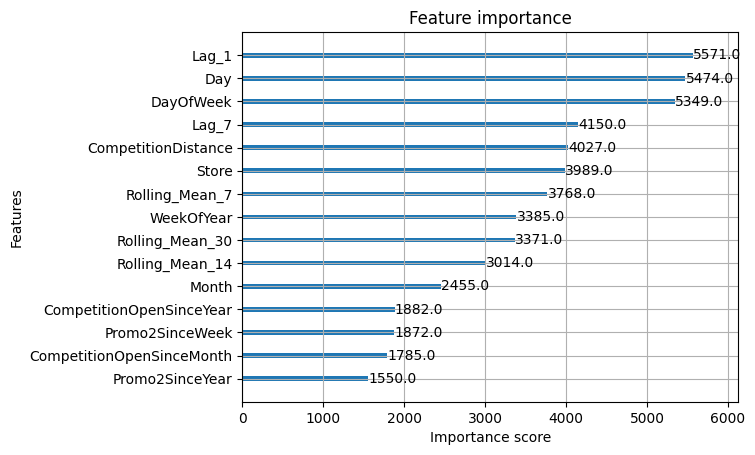

In [68]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plt.figure(figsize=(10,8))
plot_importance(model, max_num_features=15)
plt.show()

save model

In [70]:
import joblib

joblib.dump(model, "../models/xgb_model.pkl")

feature_columns = X_train.columns.tolist()
joblib.dump(feature_columns, "../models/feature_columns.pkl")

['../models/feature_columns.pkl']

In [71]:
df.to_csv("../data/processed/cleaned_data.csv", index=False)